In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [34]:
import numpy as np
import pandas as pd
import datetime as dt 
import inspect
import os

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
# create engine to hawaii.sqlite
engine = create_engine(r"sqlite:///C:/Users/Leo/Desktop/hawaii.sqlite")

In [37]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)


In [39]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [40]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [42]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print(recent_date)

2017-08-23


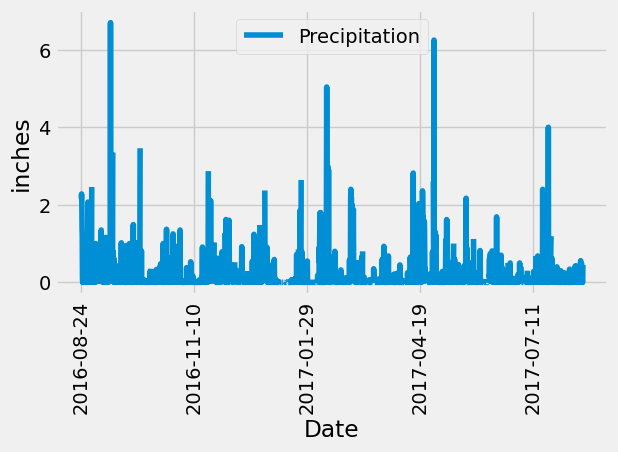

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.set_index('Date', inplace=True)
precipitation_df.plot(y='Precipitation', legend=True)
plt.ylabel('inches')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = precipitation_df['Precipitation'].describe()
summary_df = pd.DataFrame(summary)
summary_df

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(Station.station)).scalar()
print(stations)

9


In [45]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for station, count in active_stations:
    print(f"({station}, {count})")

(USC00519281, 2772)
(USC00519397, 2724)
(USC00513117, 2709)
(USC00519523, 2669)
(USC00516128, 2612)
(USC00514830, 2202)
(USC00511918, 1979)
(USC00517948, 1372)
(USC00518838, 511)


In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()

# Extract the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]
print(f"({lowest_temp}, {highest_temp}, {avg_temp})")

(54.0, 85.0, 71.66378066378067)


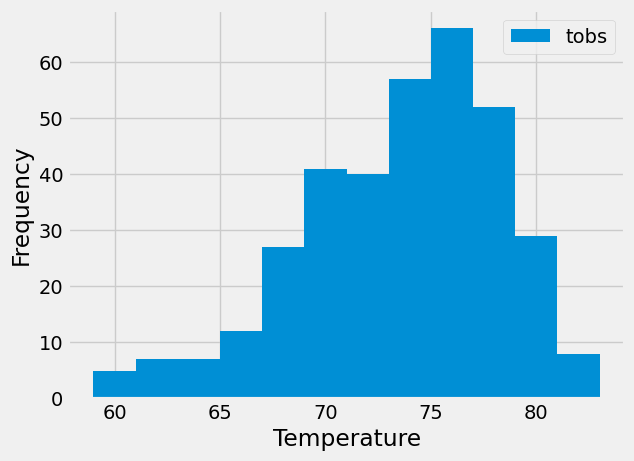

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year).all()

# Convert the query results to a list of temperature observations
temperature_df = pd.DataFrame(temperature_data, columns=['TOBS'])

# Plot the results as a histogram
plt.hist(temperature_df['TOBS'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.grid(True)
plt.show()

# Close Session

In [47]:
# Close Session
session.close()